<a href="https://colab.research.google.com/github/Amna-J/Heart-Disease-Prediction/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


In [12]:
# 1. Data Loading & Cleaning
filename = '/content/drive/MyDrive/HeartDisease/HeartDiseaseTrain-Test.csv'
df = pd.read_csv(filename)

# Check for missing values
missing_values = df.isnull().sum().sum()
print(f"Total missing values: {missing_values}")


Total missing values: 0


/tmp/ipython-input-2540886374.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


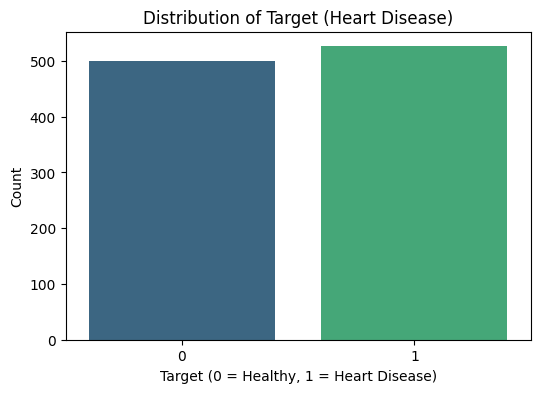

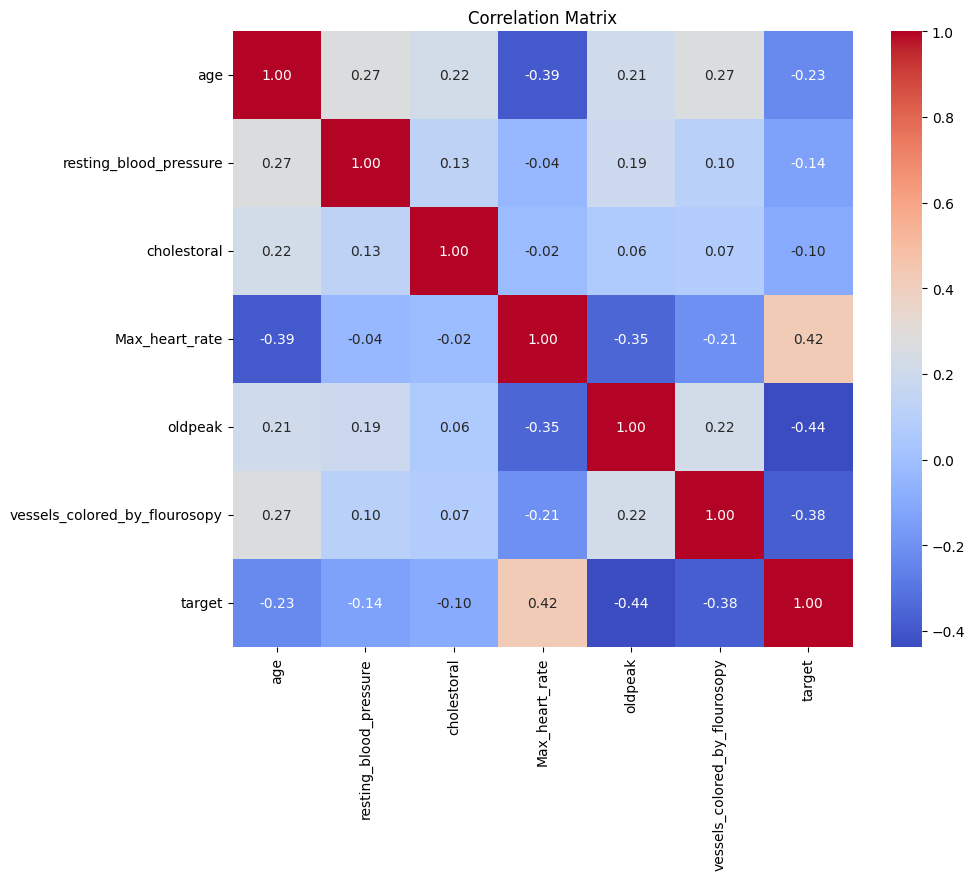

In [13]:

# 2. Exploratory Data Analysis (EDA)

# Target Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Distribution of Target (Heart Disease)')
plt.xlabel('Target (0 = Healthy, 1 = Heart Disease)')
plt.ylabel('Count')
plt.savefig('eda_target_dist.png')

# Correlation Heatmap
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('eda_correlation.png')


In [14]:
# 3. Data Preprocessing
# Encode categorical variables
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Split Features and Target
X = df.drop('target', axis=1)
y = df['target']

# Train/Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# 4. Model Training (Logistic Regression)
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

Accuracy: 0.8049

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       102
           1       0.77      0.87      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



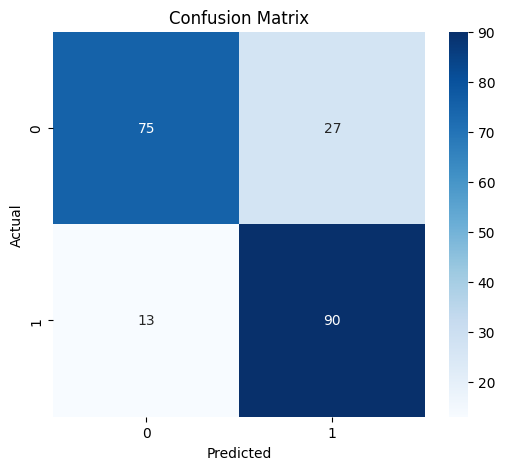

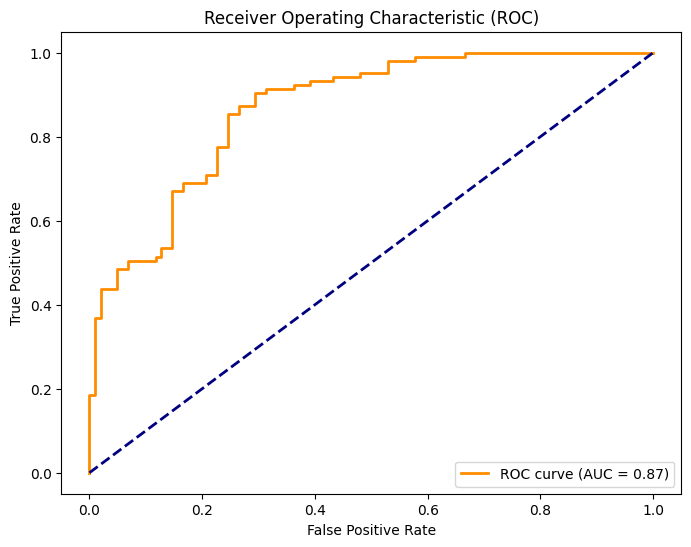

In [16]:
# 5. Evaluation
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('eval_confusion_matrix.png')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('eval_roc_curve.png')


Top 5 Important Features:
                          Feature  Coefficient
11  vessels_colored_by_flourosopy    -0.792968
12                    thalassemia    -0.716655
2                 chest_pain_type    -0.642524
1                             sex    -0.635541
9                         oldpeak    -0.597158


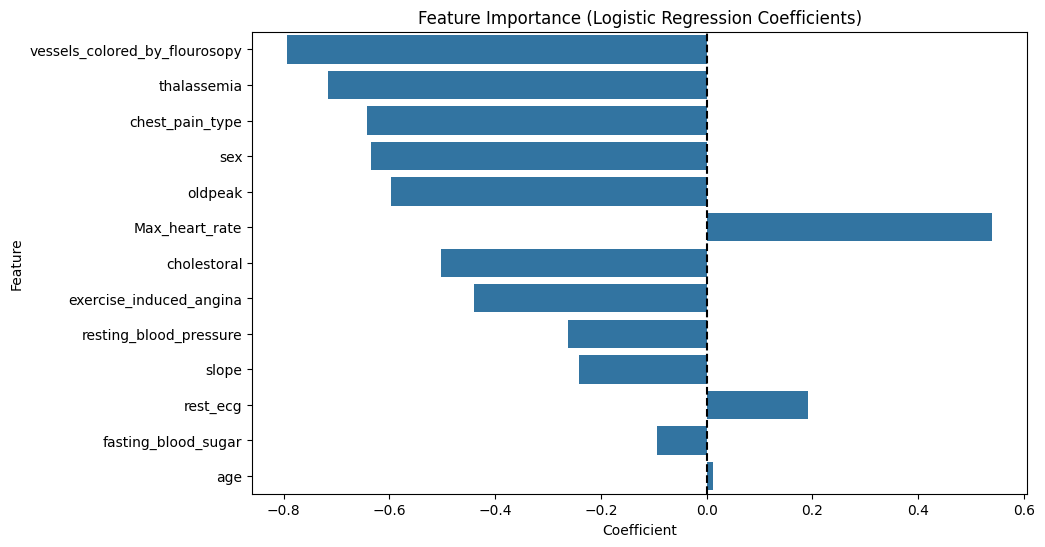

In [17]:
# 6. Feature Importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Abs_Coefficient': np.abs(model.coef_[0])
}).sort_values(by='Abs_Coefficient', ascending=False)

print("\nTop 5 Important Features:")
print(coefficients[['Feature', 'Coefficient']].head(5))

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.axvline(x=0, color='black', linestyle='--')
plt.savefig('eval_feature_importance.png')